In [3]:
import h5py as h5
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import stats
from matplotlib import cm
import cmasher as cmr
from matplotlib.colors import LogNorm
from scipy.stats import binned_statistic

import sys,glob
sys.path.insert(0,"../")
import gadget as ga
import visualisation as vis

In [2]:
# sys.path.insert(0,"/Users/z5278074/pierobon/jaxions/scripts")
# from pyaxions import jaxions as pa

# Bound fractions

In [4]:
datadir = '/Users/z5278074/gpierobon/AxionMC/Data/'

In [ ]:
# Calculate totalmass for diffmass simulations (needs a snapshot, but can be done on the cluster)

In [13]:
j = 13
head, pp = ga.load_particles(datadir+'L8/ic1/snap_%.3d'%j)
totmass  = np.sum(pp[2])
print(totmass)

Extracting particle data from /Users/z5278074/gpierobon/AxionMC/Data/L8/ic1/snap_013.hdf5
134217728 particles loaded: data is stored in header,pos,vel,mass,ID
1.9418949e-09


In [ ]:
## Bound fractions 

In [7]:
bound_s1 = ga.boundf(datadir+'L8/ic3_s25',512,totmass,masstype='samemass')    # L=8,N=512,same mass
bound_s2 = ga.boundf(datadir+'L8/ic1',512,totmass,masstype='diffmass')        # L=8,N=512,diff mass
bound_s3 = ga.boundf(datadir+'L8/ic1v',512,totmass,masstype='diffmass')       # L=8,N=512+vel,diff mass
bound_s4 = ga.boundf(datadir+'L6/ic3',1024,totmass,masstype='samemass')       # L=6,N=1024,same mass

Bound fraction from z=399893 to z=554
Bound fraction from z=100111 to z=999
Bound fraction from z=100111 to z=999
Bound fraction from z=2000001 to z=4992


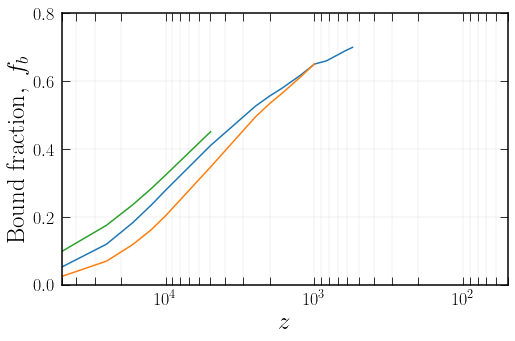

In [8]:
fig,ax = vis.single_plot(r'$z$',r'${\rm Bound~fraction},~f_b$',size_x=8,size_y=5)

ax.semilogx(bound_s1[:,0],bound_s1[:,1])
ax.semilogx(bound_s2[:,0],bound_s2[:,1])
# ax.semilogx(bound_s3[:,0],bound_s3[:,1])
ax.semilogx(bound_s4[:,0],bound_s4[:,1])

ax.set_xlim(5e4,50)
ax.set_ylim(0,0.8)

ax.grid(color='gray', linestyle='--', linewidth=0.15,which='both')
plt.show()

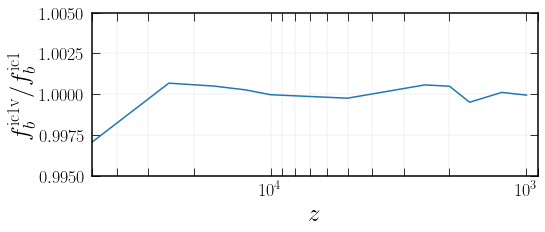

In [10]:
# Vel vs no vel in ICs, ratio in f_b 

fig,ax = vis.single_plot(r'$z$',r'$f^{\rm ic1v}_b/f^{\rm ic1}_b$',size_x=8,size_y=3)

ax.semilogx(bound_s2[:,0],bound_s3[:,1]/bound_s2[:,1])
ax.set_xlim(5e4,900)
ax.set_ylim(0.995,1.005)

ax.grid(color='gray', linestyle='--', linewidth=0.15,which='both')
plt.show()